In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
import plotly.graph_objects as go
sb.set() # set the default Seaborn style for graphics
from plotly.subplots import make_subplots

In [42]:
flightData = pd.read_csv('https://raw.githubusercontent.com/chongwei49/IE0005-DSAI-Group-Barley/master/dataset/Clean_Dataset.csv')
flightData = flightData.drop('Unnamed: 0',axis=1)
flightData

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [46]:
print("Data type : ", type(flightData))
print("Data dims : ", flightData.shape)
print(flightData.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (300153, 11)
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


In [47]:
flightData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [48]:
print('Number of null lines: ',flightData.isnull().sum().sum())
print('Number of duplicates: ',flightData.duplicated().sum())

Number of null lines:  0
Number of duplicates:  0


In [53]:
#Number of flights operating per each airline
flightData['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

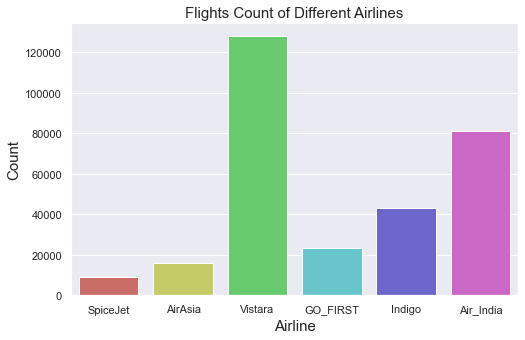

In [54]:
plt.figure(figsize=(8,5))
sb.countplot(flightData['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

##### Vistara has the highest flight counts, which means it operates the most number of routes

In [56]:
price_by_airline = flightData.groupby('airline').mean()['price']
airline = [i for i,df in flightData.groupby('airline')]

#variation of prices across the airlines
px.bar(x = airline,y=price_by_airline,color=price_by_airline,width=800,height=400,labels={
                     "x": "Airline",
                     "y": "Average Ticket Price"
                 })

##### Vistara is the most Pricey Airline Followed by Air India